# Clustering

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('du lieu cung cap/data3.txt', header=None)

In [4]:
df.head()

,0,1
0,1.225,2.7
1,4.125,5.1
2,6.375,8.6
3,10.475,11.3
4,13.475,13.2


In [5]:
df.shape

(195, 2)

In [6]:
df.isnull().any()

0    False
1    False
dtype: bool

### 1. Vẽ biểu đồ thể hiện mối quan hệ giữahai cột dữ liệu nói trên. Cho nhận xét dựa trên biểu đồ.

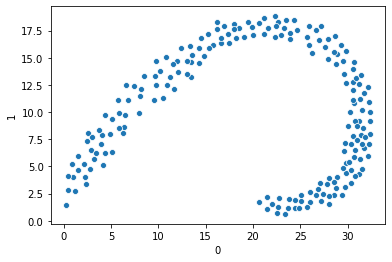

In [7]:
sns.scatterplot(df[0], df[1])

1. Dữ liệu không có outlier
2. Các điểm dữ liệu không tập trung thành từng cụm cụ thể, mà có thể theo một mô hình phi tuyến.
3. Dữ liệu không chứa missing data
4. Dự đoán dữ liệu có thể phân thành 2 tới 4 cụm

### 2.Áp dụng thuật toán thích hợp. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?

1. Do đề bài yêu cầu phân cụm dữ liệu ==> nên bài toán thuộc dạng clustering thuộc nhóm unsupervised learning
2. Số lượng dữ liệu nhỏ có thể sử dụng KMeans hoặc Hierarchy đều được

### 3. Tìm kết quả => có bao nhiêu cụm => mẫu nào thuộc cụm nào?

## Sử dụng KMeans để clustering data

In [8]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(
        sum(np.min(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

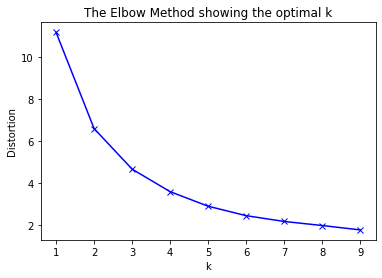

In [9]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Khủy tay xuất hiện ở k=2 và k=3, nhưng rõ nhất là k=2

==> Chọn k=2

## Sử dụng SHC

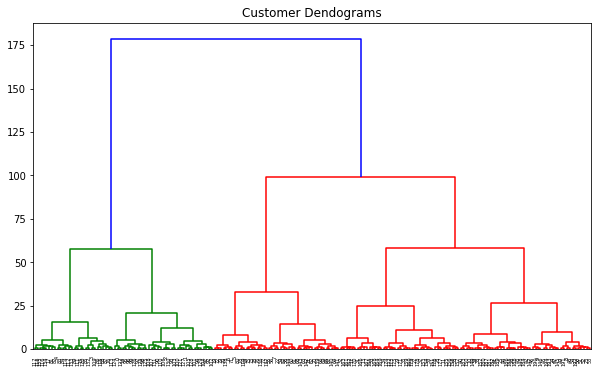

In [10]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,6))
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward')) 
plt.show()

Sử dụng Hierarchy algorithms, cũng cho ta đề xuất chọn k = 2

Do lượng dữ liệu nhỏ, kết hợp kết quả của cả 2 phương pháp cluster

==> n_clusters = 2

In [11]:
k = 2
kmeanModel = KMeans(n_clusters=k)

In [12]:
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
df['Group'] = kmeanModel.labels_
df.head()

,0,1,Group
0,1.225,2.7,1
1,4.125,5.1,1
2,6.375,8.6,1
3,10.475,11.3,1
4,13.475,13.2,1


### 5. Với X_new như sau: X_new = [[5.5, 9.5], [16.5, 15.5], [30.0, 10.0], [29.375, 3.0]]thì mỗi mẫu sẽ lần lượt thuộc cụm nào?

In [14]:
X_new = np.array([[5.5, 9.5], [16.5, 15.5], [30.0, 10.0], [29.375, 3.0]])
for point in X_new:
    print('Điểm', point, 'thuộc cụm',kmeanModel.predict([point])[0])

Điểm [5.5 9.5] thuộc cụm 1
Điểm [16.5 15.5] thuộc cụm 1
Điểm [30. 10.] thuộc cụm 0
Điểm [29.375  3.   ] thuộc cụm 0


### 6. Vẽ hình (với mỗi cụm là một màu), trên hình có biểu diễn luôn kết quả của X_new.

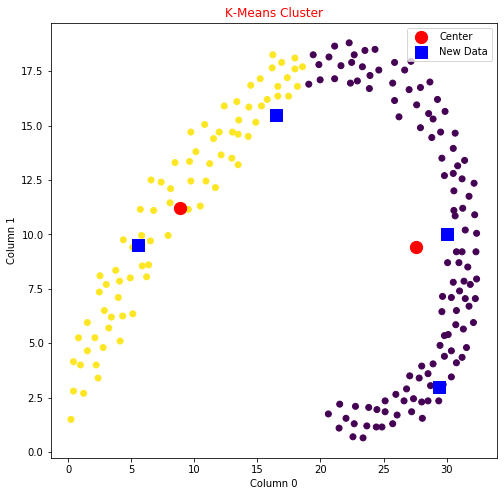

In [15]:
plt.figure(figsize=(8,8))
centroids = kmeanModel.cluster_centers_

plt.scatter(df[0], df[1], c=kmeanModel.labels_)
plt.scatter(centroids[:, 0],centroids[:, 1], marker="o", s=150, color='r', label='Center')
plt.scatter(X_new[:, 0], X_new[:, 1], marker="s", c='b', s=150, label='New Data')
plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.title("K-Means Cluster", color="red")
plt.legend()
plt.show()

### 4. Nhận xét trên cụm

Dựa trên việc visualize data ==> ta thấy cả 2 phần của dữ liệu không bị trộn lẫn
1. Một nữa dữ liệu với x < 20 ==> cho ta dữ liệu tuyến tính theo x và y
2. Một nữa dữ liệu với x >= 20 ==> cho ta dữ liệu phi tuyến tính và có dạng là 1 parabol theo x và y
3. Các centroids nằm ở khoảng giữa của 2 cluster, và cách đều các điểm dữ liệu của mỗi cluster